In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Part c


In [3]:
# Define the kernel function
def kernel(x, x_prime, tau_squared=0.12):
    return np.exp(-(x - x_prime)**2 / (2 * tau_squared))



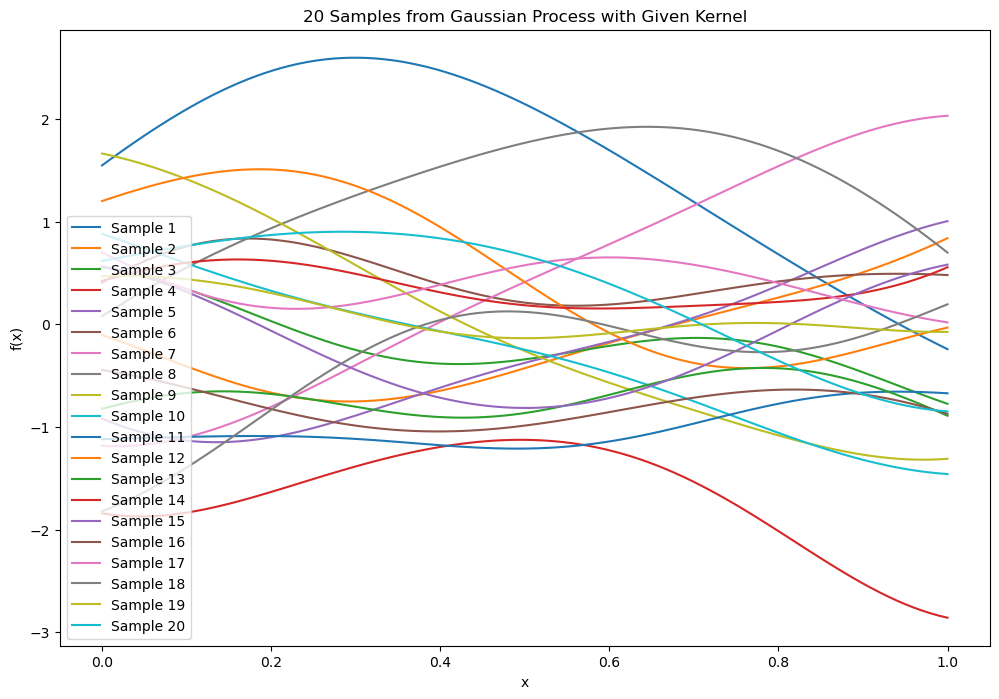

In [27]:
# Number of samples and points in the domain
num_samples = 20
num_points = 100

# Equispaced points on [0, 1]
z = np.linspace(0, 1, num_points)

# Construct the covariance matrix based on the kernel function
K = np.zeros((num_points, num_points))
for i in range(num_points):
    for j in range(num_points):
        K[i, j] = kernel(z[i], z[j])

# Generate n samples from the multivariate normal distribution
samples = np.random.multivariate_normal(np.zeros(num_points), K, num_samples)

# Plotting the samples
plt.figure(figsize=(12, 8))
for i in range(num_samples):
    plt.plot(z, samples[i], label=f'Sample {i+1}')
plt.title('20 Samples from Gaussian Process with Given Kernel')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

# Part D

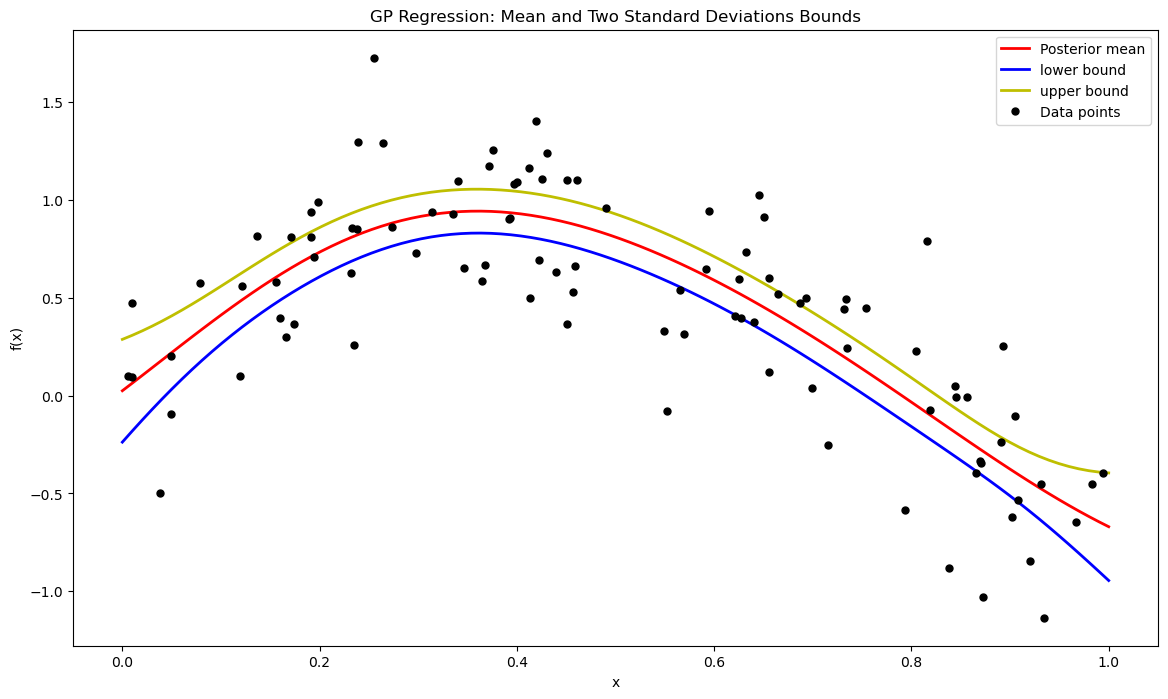

In [28]:
# Apply GP regression to dataset gp.dat

# Load gp.dat
x_data, y_data = np.loadtxt('gp.dat', unpack=True)

# Compute the kernel matrix K for the data points from gp.dat
K = np.zeros((len(x_data), len(x_data)))
for i in range(len(x_data)):
    for j in range(len(x_data)):
        K[i, j] = kernel(x_data[i], x_data[j])

# Assume a noise level in the data
sigma_n_squared = 0.1
K_y = K + sigma_n_squared * np.eye(len(x_data))

# Inverse of K_y
K_y_inv = np.linalg.inv(K_y)

# Domain for test points
x_pred = np.linspace(0, 1, 100)

# Compute the mean at our test points.
K_s = np.zeros((len(x_pred), len(x_data)))  # Cross-covariance
for i in range(len(x_pred)):
    for j in range(len(x_data)):
        K_s[i, j] = kernel(x_pred[i], x_data[j])

# Mean of the posterior
mu_s = K_s @ K_y_inv @ y_data

# Compute the covariance matrix for the test points
K_ss = np.zeros((len(x_pred), len(x_pred)))  # Covariance between test points
for i in range(len(x_pred)):
    for j in range(len(x_pred)):
        K_ss[i, j] = kernel(x_pred[i], x_pred[j])

# Covariance of the posterior
cov_s = K_ss - K_s @ K_y_inv @ K_s.T

# Standard deviation for plotting
std_s = np.sqrt(np.diag(cov_s))
std_bound1= mu_s - 2 * std_s
std_bound2= mu_s + 2 * std_s


# Plotting the mean and uncertainty
plt.figure(figsize=(14, 8))
plt.plot(x_pred, mu_s, 'r-', lw=2, label='Posterior mean')
plt.plot(x_pred, std_bound1, 'b-', lw=2, label='lower bound')
plt.plot(x_pred, std_bound2, 'y-', lw=2, label='upper bound')

plt.plot(x_data, y_data, 'ko', markersize=5, label='Data points')
plt.title('GP Regression: Mean and Two Standard Deviations Bounds')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()


# Part E

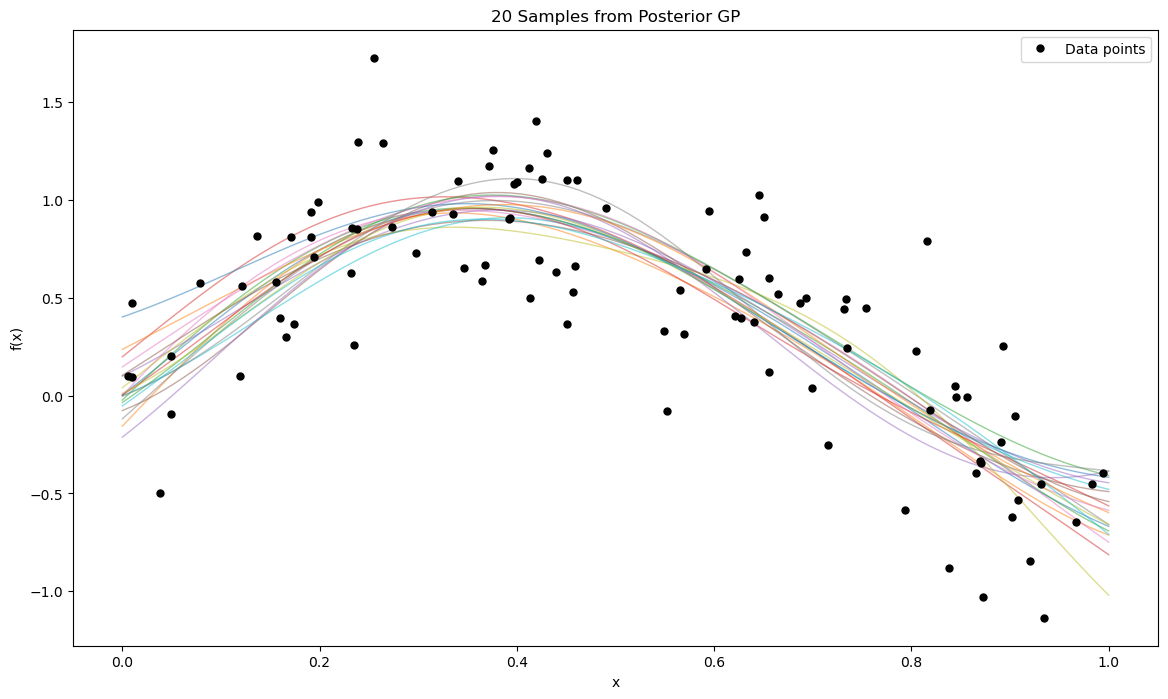

In [24]:
# Draw samples from the posterior
num_samples = 20
posterior_samples = np.random.multivariate_normal(mu_s, cov_s, num_samples)

# Plot the samples from the posterior
plt.figure(figsize=(14, 8))
for i in range(num_samples):
    plt.plot(x_pred, posterior_samples[i], lw=1, alpha=0.5)
plt.plot(x_data, y_data, 'ko', markersize=5, label='Data points')
plt.title('20 Samples from Posterior GP')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()
